In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from pycaret.classification import setup, compare_models, tune_model, evaluate_model
import matplotlib.pyplot as plt

In [70]:
from matplotlib import font_manager, rc
import matplotlib
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc("font", family = font_name)

In [71]:
df = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [72]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [73]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [74]:
df.shape, test.shape

((7905, 20), (5271, 19))

In [75]:
df.drop('id', axis = 1, inplace = True)
test_id = test.pop('id')

In [76]:
# Y = df.pop('Status')

In [77]:
# Y.value_counts()

In [78]:
Y_map = {'C':0, 'CL':1, 'D':2}
Y_map_r = {0:'C', 1:'CL', 2:'D'}

In [79]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [80]:
df['Status'] = df['Status'].map(Y_map)

In [81]:
# Y = Y.replace(Y_map)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [83]:
df['Drug'].value_counts()

Placebo            4010
D-penicillamine    3895
Name: Drug, dtype: int64

In [84]:
test['Drug'].value_counts()

Placebo            2694
D-penicillamine    2577
Name: Drug, dtype: int64

In [85]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511,0.709045
std,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511,0.938439
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,0.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000,0.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000,0.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000,2.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000,2.000000


In [86]:
df['Age'] = (df['Age']/365).astype('int64')
test['Age'] = (test['Age']/365).astype('int64')

In [87]:
# df['Age_cat'] = (df['Age'] // 10).astype('object')
# test['Age_cat'] = (test['Age'] // 10).astype('object')

In [88]:
# df.drop('Age', axis = 1, inplace = True)
# test.drop('Age', axis = 1, inplace = True)

In [89]:
# df.drop('N_Days', axis = 1, inplace = True)
# test.drop('N_Days', axis = 1, inplace = True)

In [90]:
df.describe(include = 'O')

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,7905,7905,7905,7905,7905,7905
unique,2,2,2,2,2,3
top,Placebo,F,N,Y,N,N
freq,4010,7336,7525,4042,5966,7161


In [91]:
# df['Platelets'] = (df['Platelets'] >= 150) & (df['Platelets'] <= 450)
# test['Platelets'] = (test['Platelets'] >= 150) & (test['Platelets'] <= 450)

In [92]:
df['Platelets_c'] = 0
df.loc[df['Platelets'] < 150, 'Platelets_c'] = 0
df.loc[df['Platelets'] >= 150, 'Platelets_c'] = 1
df.loc[df['Platelets'] > 450, 'Platelets_c'] = 2

test['Platelets_c'] = 0
test.loc[test['Platelets'] < 150, 'Platelets_c'] = 0
test.loc[test['Platelets'] >= 150, 'Platelets_c'] = 1
test.loc[test['Platelets'] > 450, 'Platelets_c'] = 2

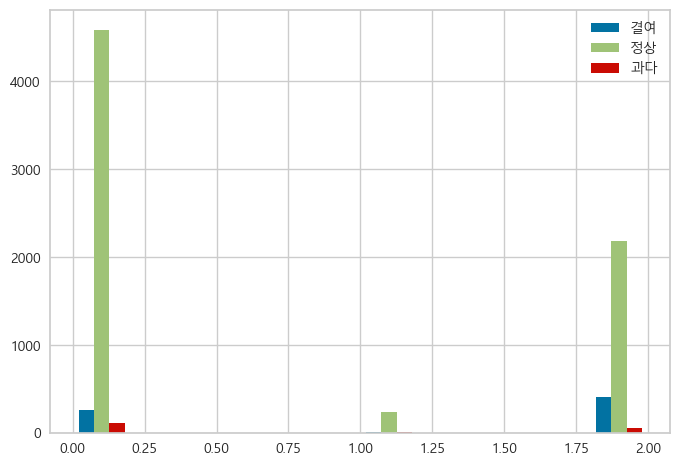

In [93]:
plt.plot()
plt.hist([df[df['Platelets_c'] == 0]['Status'], df[df['Platelets_c'] == 1]['Status'], df[df['Platelets_c'] == 2]['Status']], label = ['결여', '정상', '과다'])
plt.legend()
plt.show()

In [94]:
# df['Bilirubin'] = (df['Bilirubin'] >= 0.1) & (df['Bilirubin'] <= 1.2)
# test['Bilirubin'] = (test['Bilirubin'] >= 0.1) & (test['Bilirubin'] <= 1.2)

In [95]:
df['Bilirubin_c'] = 0
df.loc[df['Bilirubin'] < 0.1, 'Bilirubin_c'] = 0
df.loc[df['Bilirubin'] >= 0.1, 'Bilirubin_c'] = 1
df.loc[df['Bilirubin'] > 1.2, 'Bilirubin_c'] = 2

test['Bilirubin_c'] = 0
test.loc[test['Bilirubin'] < 0.1, 'Bilirubin_c'] = 0
test.loc[test['Bilirubin'] >= 0.1, 'Bilirubin_c'] = 1
test.loc[test['Bilirubin'] > 1.2, 'Bilirubin_c'] = 2

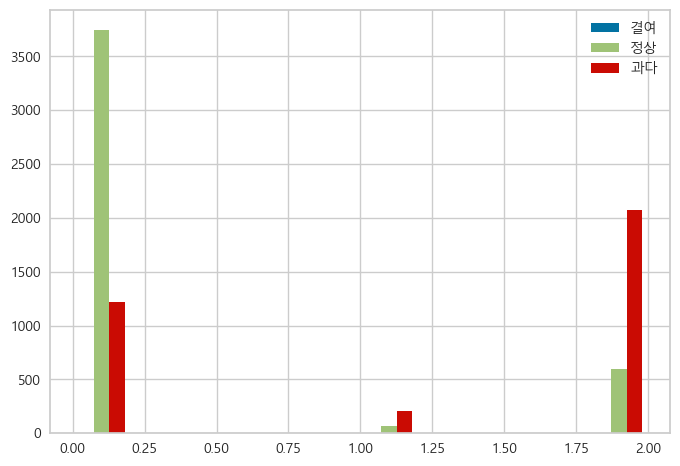

In [96]:
plt.plot()
plt.hist([df[df['Bilirubin_c'] == 0]['Status'], df[df['Bilirubin_c'] == 1]['Status'], df[df['Bilirubin_c'] == 2]['Status']], label = ['결여', '정상', '과다'])
plt.legend()
plt.show()

In [97]:
# df['Cholesterol'] = df['Cholesterol'] <= 220
# test['Cholesterol'] = test['Cholesterol'] <= 220

In [98]:
df['Cholesterol_c'] = 0
df.loc[df['Cholesterol'] < 220, 'Cholesterol_c'] = 0
df.loc[df['Cholesterol'] >= 220, 'Cholesterol_c'] = 1

test['Cholesterol_c'] = 0
test.loc[test['Cholesterol'] < 220, 'Cholesterol_c'] = 0
test.loc[test['Cholesterol'] >= 220, 'Cholesterol_c'] = 1

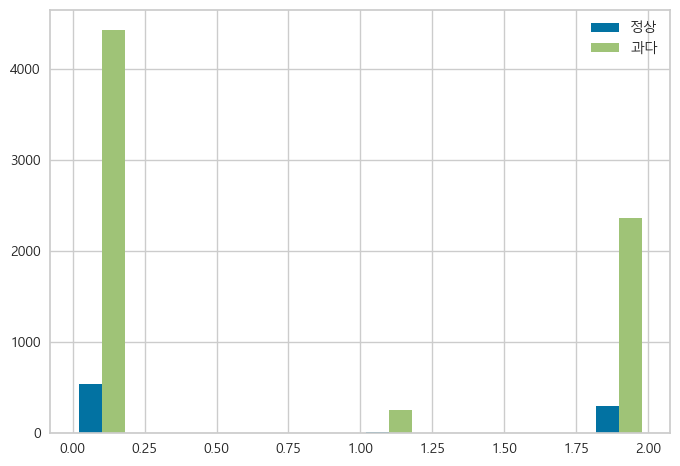

In [99]:
plt.plot()
plt.hist([df[df['Cholesterol_c'] == 0]['Status'], df[df['Cholesterol_c'] == 1]['Status']], label = ['정상', '과다'])
plt.legend()
plt.show()

In [100]:
# df['Albumin'] = (df['Albumin'] >= 3.5) & (df['Albumin'] <= 5.2)
# test['Albumin'] = (test['Albumin'] >= 3.5) & (test['Albumin'] <= 5.2)

In [101]:
df['Albumin_c'] = 0
df.loc[df['Albumin'] < 3.5, 'Albumin_c'] = 0
df.loc[df['Albumin'] >= 3.5, 'Albumin_c'] = 1
df.loc[df['Albumin'] > 5.2, 'Albumin_c'] = 2

test['Albumin_c'] = 0
test.loc[test['Albumin'] < 3.5, 'Albumin_c'] = 0
test.loc[test['Albumin'] >= 3.5, 'Albumin_c'] = 1
test.loc[test['Albumin'] > 5.2, 'Albumin_c'] = 2

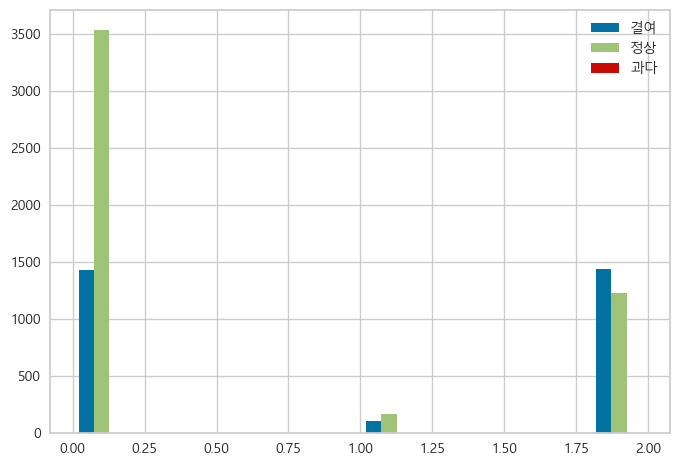

In [102]:
plt.plot()
plt.hist([df[df['Albumin_c'] == 0]['Status'], df[df['Albumin_c'] == 1]['Status'], df[df['Albumin_c'] == 2]['Status']], label = ['결여', '정상', '과다'])
plt.legend()
plt.show()

In [103]:
# df['Copper'] = (df['Copper'] >= 46) & (df['Copper'] <= 79)
# test['Copper'] = (test['Copper'] >= 46) & (test['Copper'] <= 79)

In [104]:
df['Copper_c'] = 0
df.loc[df['Copper'] < 46, 'Copper_c'] = 0
df.loc[df['Copper'] >= 46, 'Copper_c'] = 1
df.loc[df['Copper'] > 79, 'Copper_c'] = 2

test['Copper_c'] = 0
test.loc[test['Copper'] < 46, 'Copper_c'] = 0
test.loc[test['Copper'] >= 46, 'Copper_c'] = 1
test.loc[test['Copper'] > 79, 'Copper_c'] = 2

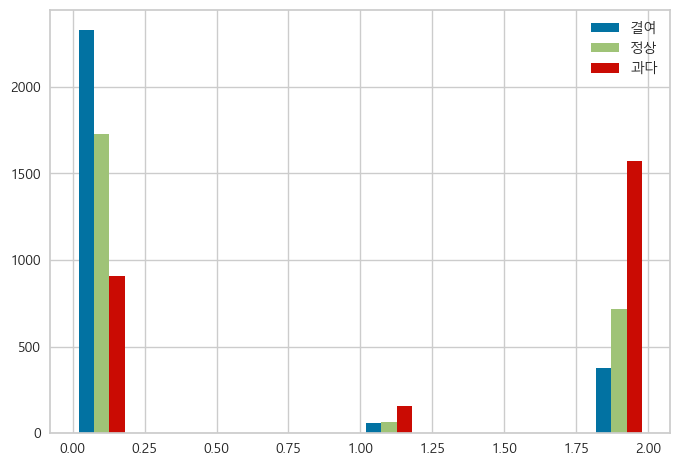

In [105]:
plt.plot()
plt.hist([df[df['Copper_c'] == 0]['Status'], df[df['Copper_c'] == 1]['Status'], df[df['Copper_c'] == 2]['Status']], label = ['결여', '정상', '과다'])
plt.legend()
plt.show()

In [106]:
# df['Alk_Phos'] = (df['Alk_Phos'] >= 440) & (df['Alk_Phos'] <= 1470)
# test['Alk_Phos'] = (test['Alk_Phos'] >= 440) & (test['Alk_Phos'] <= 1470)

In [107]:
df['Alk_Phos_c'] = 0
df.loc[df['Alk_Phos'] < 440, 'Alk_Phos_c'] = 0
df.loc[df['Alk_Phos'] >= 440, 'Alk_Phos_c'] = 1
df.loc[df['Alk_Phos'] > 1470, 'Alk_Phos_c'] = 2

test['Alk_Phos_c'] = 0
test.loc[test['Alk_Phos'] < 440, 'Alk_Phos_c'] = 0
test.loc[test['Alk_Phos'] >= 440, 'Alk_Phos_c'] = 1
test.loc[test['Alk_Phos'] > 1470, 'Alk_Phos_c'] = 2

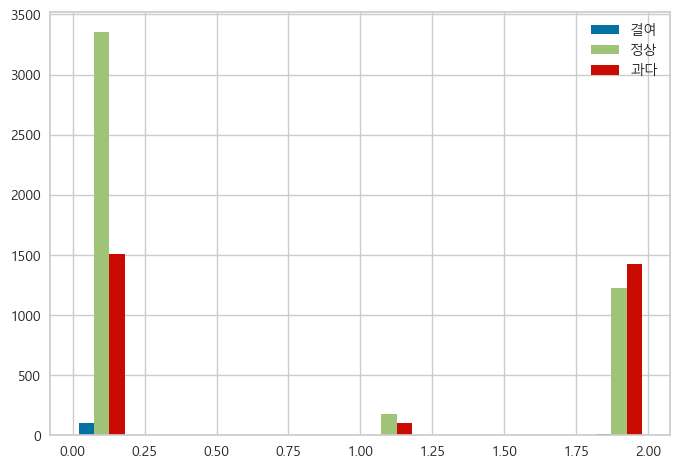

In [108]:
plt.plot()
plt.hist([df[df['Alk_Phos_c'] == 0]['Status'], df[df['Alk_Phos_c'] == 1]['Status'], df[df['Alk_Phos_c'] == 2]['Status']], label = ['결여', '정상', '과다'])
plt.legend()
plt.show()

In [109]:
# df['SGOT'] = df['SGOT'] <= 40
# test['SGOT'] = test['SGOT'] <= 40

In [110]:
df['SGOT_c'] = 0
df.loc[df['SGOT'] < 40, 'SGOT_c'] = 0
df.loc[df['SGOT'] >= 40, 'SGOT_c'] = 1

test['SGOT_c'] = 0
test.loc[test['SGOT'] < 40, 'SGOT_c'] = 0
test.loc[test['SGOT'] >= 40, 'SGOT_c'] = 1

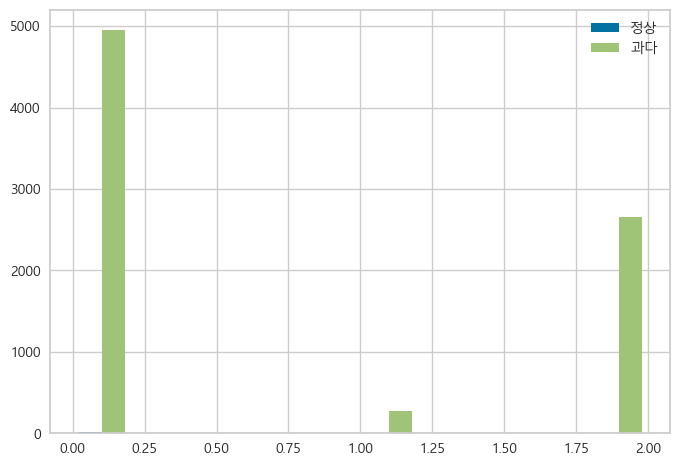

In [111]:
plt.plot()
plt.hist([df[df['SGOT_c'] == 0]['Status'], df[df['SGOT_c'] == 1]['Status']], label = ['정상', '과다'])
plt.legend()
plt.show()

In [112]:
# df['Tryglicerides'] = df['Tryglicerides'] <= 150
# test['Tryglicerides'] = test['Tryglicerides'] <= 150

In [113]:
df['Tryglicerides_c'] = 0
df.loc[df['Tryglicerides'] < 150, 'Tryglicerides_c'] = 0
df.loc[df['Tryglicerides'] >= 150, 'Tryglicerides_c'] = 1

test['Tryglicerides_c'] = 0
test.loc[test['Tryglicerides'] < 150, 'Tryglicerides_c'] = 0
test.loc[test['Tryglicerides'] >= 150, 'Tryglicerides_c'] = 1

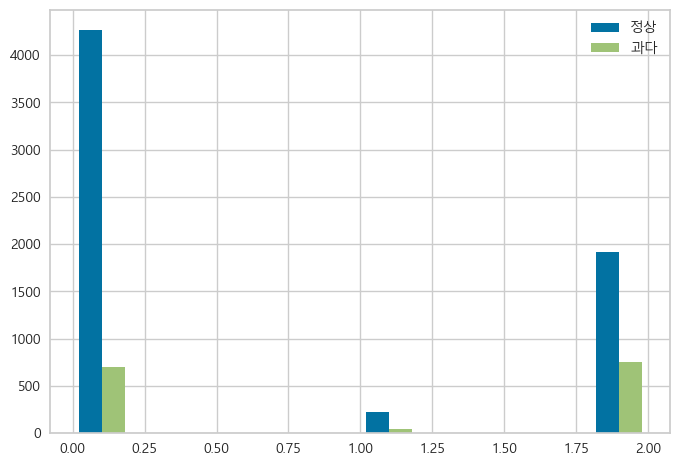

In [114]:
plt.plot()
plt.hist([df[df['Tryglicerides_c'] == 0]['Status'], df[df['Tryglicerides_c'] == 1]['Status']], label = ['정상', '과다'])
plt.legend()
plt.show()

In [115]:
# df['Prothrombin'] = (df['Prothrombin'] >= 11.4) & (df['Prothrombin'] <= 15.4)
# test['Prothrombin'] = (test['Prothrombin'] >= 11.4) & (test['Prothrombin'] <= 15.4)

In [116]:
df['Prothrombin_c'] = 0
df.loc[df['Prothrombin'] < 11.4, 'Prothrombin_c'] = 0
df.loc[df['Prothrombin'] >= 11.4, 'Prothrombin_c'] = 1
df.loc[df['Prothrombin'] > 15.4, 'Prothrombin_c'] = 2

test['Prothrombin_c'] = 0
test.loc[test['Prothrombin'] < 11.4, 'Prothrombin_c'] = 0
test.loc[test['Prothrombin'] >= 11.4, 'Prothrombin_c'] = 1
test.loc[test['Prothrombin'] > 15.4, 'Prothrombin_c'] = 2

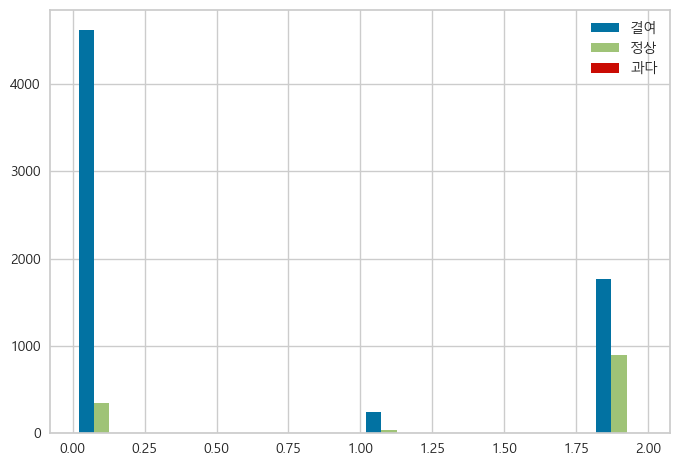

In [117]:
plt.plot()
plt.hist([df[df['Prothrombin_c'] == 0]['Status'], df[df['Prothrombin_c'] == 1]['Status'], df[df['Prothrombin_c'] == 2]['Status']], label = ['결여', '정상', '과다'])
plt.legend()
plt.show()

In [118]:
# df.drop(['Platelets', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Prothrombin'], axis = 1, inplace = True)
# test.drop(['Platelets', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Prothrombin'], axis = 1, inplace = True)

In [119]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Platelets_c,Bilirubin_c,Cholesterol_c,Albumin_c,Copper_c,Alk_Phos_c,SGOT_c,Tryglicerides_c,Prothrombin_c
0,999,D-penicillamine,58,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2,1,2,1,0,2,2,1,0,0
1,2574,Placebo,52,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0,1,1,1,1,1,1,1,0,0
2,3428,Placebo,37,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2,1,2,1,1,2,1,1,0,1
3,2576,Placebo,50,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0,1,1,1,1,1,2,1,0,0
4,788,Placebo,45,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0,1,1,1,1,1,1,1,0,0


In [120]:
# df.describe(include = "bool")

In [121]:
Y = df.pop('Status')

In [122]:
combined = pd.concat([df, test], axis = 0)

In [123]:
col_n = combined.select_dtypes(['int64', 'float64']).columns
col_o = combined.select_dtypes('object').columns
col_b = combined.select_dtypes('bool').columns

In [124]:
combined_n = combined[col_n]
combined_o = combined[col_o]

In [125]:
# df_n = df[col_n]
# df_o = df[col_o]
# df_b = df[col_b]

# test_n = test[col_n]
# test_o = test[col_o]
# test_b = test[col_b]

In [126]:
# rs = RobustScaler()
# df_n = pd.DataFrame(rs.fit_transform(df_n), columns = col_n)
# test_n = pd.DataFrame(rs.transform(test_n), columns = col_n)

In [127]:
ss = StandardScaler()
combined_n = pd.DataFrame(ss.fit_transform(combined_n), columns = col_n)

In [128]:
combined_o = pd.get_dummies(combined_o)
combined_o.reset_index(drop = True, inplace = True)

In [129]:
# df_o = pd.get_dummies(df_o)
# test_o = pd.get_dummies(test_o)

In [130]:
# df2 = pd.concat([df_n, df_o, df_b, Y], axis = 1)
# test2 = pd.concat([test_n, test_o, test_b], axis = 1)

In [131]:
combinded2 = pd.concat([combined_n, combined_o], axis = 1)
df2 = combinded2.iloc[:len(df)]
test2 = combinded2.iloc[len(df):]

In [132]:
# Y = Y.map(Y_map_r)

In [133]:
df2 = pd.concat([df2, Y], axis = 1)

In [134]:
df2.shape, test2.shape

((7905, 35), (5271, 34))

In [135]:
test = setup(data = df2, target = 'Status', train_size = 0.80, fold = 5)

,Description,Value
0,Session id,499
1,Target,Status
2,Target type,Multiclass
3,Original data shape,"(7905, 35)"
4,Transformed data shape,"(7905, 35)"
5,Transformed train set shape,"(6324, 35)"
6,Transformed test set shape,"(1581, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


In [136]:
top5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8238,0.8988,0.8238,0.8158,0.8147,0.6253,0.6280,0.6200
gbc,Gradient Boosting Classifier,0.8221,0.9021,0.8221,0.8096,0.8101,0.6188,0.6227,0.6400
rf,Random Forest Classifier,0.8200,0.8957,0.8200,0.8183,0.8063,0.6125,0.6171,0.0960
xgboost,Extreme Gradient Boosting,0.8166,0.8925,0.8166,0.8084,0.8080,0.6104,0.6129,0.1240
ada,Ada Boost Classifier,0.8101,0.7526,0.8101,0.7987,0.8025,0.5994,0.6014,0.0660
et,Extra Trees Classifier,0.8042,0.8790,0.8042,0.7963,0.7910,0.5803,0.5839,0.0780
ridge,Ridge Classifier,0.8036,0.0000,0.8036,0.7732,0.7870,0.5759,0.5805,0.0120
lda,Linear Discriminant Analysis,0.8034,0.8753,0.8034,0.7817,0.7887,0.5775,0.5814,0.0160
lr,Logistic Regression,0.8030,0.8767,0.8030,0.7735,0.7868,0.5749,0.5794,0.7540
knn,K Neighbors Classifier,0.7840,0.8369,0.7840,0.7692,0.7708,0.5307,0.5386,0.6140


In [137]:
model1 = tune_model(top5[0])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:57:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8364,0.9237,0.8364,0.8189,0.8239,0.6512,0.6540
1,0.8229,0.9014,0.8229,0.8118,0.8114,0.6213,0.6246
2,0.8261,0.8905,0.8261,0.8182,0.8172,0.6310,0.6333
3,0.8269,0.9056,0.8269,0.8155,0.8121,0.6246,0.6312
4,0.8165,0.9034,0.8165,0.8057,0.8072,0.6099,0.6124
Mean,0.8257,0.9049,0.8257,0.8140,0.8144,0.6276,0.6311
Std,0.0065,0.0107,0.0065,0.0048,0.0057,0.0136,0.0136


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [138]:
model2 = tune_model(top5[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8419,0.9183,0.8419,0.8372,0.8314,0.6640,0.6663
1,0.8316,0.8957,0.8316,0.8217,0.8223,0.6422,0.6447
2,0.8182,0.8856,0.8182,0.8096,0.8108,0.6165,0.6181
3,0.8277,0.9029,0.8277,0.8172,0.8172,0.6297,0.6349
4,0.8196,0.9073,0.8196,0.8117,0.8124,0.6182,0.6203
Mean,0.8278,0.9020,0.8278,0.8195,0.8188,0.6341,0.6369
Std,0.0086,0.0110,0.0086,0.0098,0.0075,0.0176,0.0177


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [139]:
model3 = tune_model(top5[2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8229,0.9109,0.8229,0.7934,0.8049,0.6124,0.6210
1,0.8111,0.8819,0.8111,0.7806,0.7934,0.5883,0.5951
2,0.8016,0.8729,0.8016,0.7711,0.7848,0.5712,0.5759
3,0.8111,0.8856,0.8111,0.7810,0.7934,0.5882,0.5955
4,0.8149,0.8843,0.8149,0.7843,0.7979,0.5992,0.6045
Mean,0.8123,0.8871,0.8123,0.7821,0.7949,0.5919,0.5984
Std,0.0069,0.0127,0.0069,0.0071,0.0066,0.0136,0.0146


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [140]:
model4 = tune_model(top5[3])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8300,0.9150,0.8300,0.8137,0.8171,0.6363,0.6396
1,0.8277,0.8929,0.8277,0.8218,0.8180,0.6336,0.6360
2,0.8237,0.8834,0.8237,0.8176,0.8169,0.6280,0.6297
3,0.8308,0.9053,0.8308,0.8287,0.8210,0.6361,0.6413
4,0.8141,0.8986,0.8141,0.8030,0.8045,0.6027,0.6063
Mean,0.8253,0.8990,0.8253,0.8169,0.8155,0.6273,0.6306
Std,0.0061,0.0107,0.0061,0.0086,0.0057,0.0127,0.0128


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [141]:
model5 = tune_model(top5[4])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8308,0.8173,0.8308,0.8115,0.8153,0.6325,0.6394
1,0.8198,0.7707,0.8198,0.8034,0.8069,0.6145,0.6176
2,0.8119,0.7406,0.8119,0.7976,0.8016,0.5992,0.6022
3,0.8126,0.7843,0.8126,0.7913,0.7992,0.5972,0.6018
4,0.8204,0.7788,0.8204,0.8081,0.8092,0.6164,0.6196
Mean,0.8191,0.7784,0.8191,0.8024,0.8064,0.6120,0.6161
Std,0.0068,0.0246,0.0068,0.0072,0.0057,0.0129,0.0138


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [142]:
evaluate_model(model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [143]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [144]:
voting = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')

In [145]:
X_tr, X_val, y_tr, y_val = train_test_split(df2.drop('Status', axis = 1), df2['Status'], test_size = 0.2, random_state = 0)

In [146]:
voting.fit(X_tr, y_tr)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1778
[LightGBM] [Info] Number of data points in the train set: 6324, number of used features: 33
[LightGBM] [In

VotingClassifier(estimators=[('model1',
                              LGBMClassifier(bagging_fraction=0.4,
                                             bagging_freq=6,
                                             boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             feature_fraction=0.6,
                                             importance_type='split',
                                             learning_rate=0.05, max_depth=-1,
                                             min_child_samples=21,
                                             min_child_weight=0.001,
                                             min_split_gain=0.7,
                                             n_estimators=130, n_jobs=-1,
                                             num_leaves=256, objective=None,
                                             ran...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=240, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('model5',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator='deprecated',
                                                 estimator=None,
                                                 learning_rate=0.3,
                                                 n_estimators=160,
                                                 random_state=499))],
                 flatten_transform=True, n_jobs=None, verbose=False,
                 voting='soft', weights=None)

In [147]:
pred = voting.predict(X_val)
print(f"Voting Acc : {accuracy_score(y_val, pred)}")

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Voting Acc : 0.8140417457305503


In [148]:
models = [model1, model2, model3, model4, model5]
for i in models:
    i.fit(X_tr, y_tr)
    m_pred = i.predict(X_val)
    name = i.__class__.__name__
    print(f"{name} Acc : {accuracy_score(y_val, m_pred)}")

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1778
[LightGBM] [Info] Number of data points in the train set: 6324, number of used features: 33
[LightGBM] [In

In [149]:
submit = pd.DataFrame(voting.predict_proba(test2), columns = ['Status_C', 'Status_CL', 'Status_D'])

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


In [150]:
submit2 = pd.concat([test_id, submit], axis = 1)

In [151]:
submit2.to_csv('7th.csv', index = False)

In [152]:
submit2.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.493525,0.074532,0.431944
1,7906,0.653392,0.125846,0.220763
2,7907,0.101005,0.066679,0.832315
3,7908,0.840963,0.064499,0.094538
4,7909,0.696577,0.121591,0.181833
